## OECD Datasets

Containing the following columns:
* cname (Country name)
* year (Year of record)
* Civil Justice is Free of Corruption ( Project, W. J. (2023). WJP Rule of Law Index 2022. https://worldjusticeproject.org/rule-of-law-index/)
* Criminal System is Free of Corruption (Project, W. J. (2023). WJP Rule of Law Index 2022. https://worldjusticeproject.org/rule-of-law-index/)
* Corruption Commission Present in Constitution (Elkins, Z., & Ginsburg, T. (2022). Characteristics of national constitutions, version 4.0. In Comparative Constitutions Project.)
* Civil Rights (Donner, S., Hartmann, H., Härterich, C., & Steinkamp, S. (2022). Transformation index of the bertelsmann stiftung 2022. Bertelsmann Stiftung.)
* Anti Corruption Policy (Donner, S., Hartmann, H., Härterich, C., & Steinkamp, S. (2022). Transformation index of the bertelsmann stiftung 2022. Bertelsmann Stiftung.)
* The Bayesian Corruption Indicator (Standaert, S. (2015). Divining the level of corruption: A bayesian state-space approach. Journal of Comparative Economics, 43(3), 782–803.)

Description of columns:
https://www.qogdata.pol.gu.se/dataarchive/qog_bas_jan23.pdf

Download filter for datasets: https://datafinder.qog.gu.se/downloads?download=bti_acp,bti_cr,ccp_cc,ess_health,ess_trlegal,ess_trpeople,wef_qoi,undp_hdi,iiag_he,pwt_hci,wjp_abs_cor,wjp_civ_just,wjp_cj_cor,wjp_crsys_cor,bci_bci,wbgi_cce,wdi_litrad,wdi_refasy,wdi_refori

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
oecd_data = pd.read_csv("../data/processed/oecd.csv")
print(oecd_data.describe(include='all'))

          cname        year Civil Justice is Free of Corruption  \
count       743         743                                 279   
unique       36          21                                  69   
top     Albania  2013-01-01                                0,77   
freq         21          36                                  13   

       Criminal System is Free of Corruption  \
count                                    279   
unique                                    66   
top                                     0,75   
freq                                      12   

       Corruption Commission Present in Constitution Civil Rights  \
count                                            659          160   
unique                                             1            7   
top                                             2,00         8,00   
freq                                             659           57   

       Anti Corruption Policy The Bayesian Corruption Indicator  
count      

In [10]:
print(oecd_data.isnull().sum())

cname                                              0
year                                               0
Civil Justice is Free of Corruption              464
Criminal System is Free of Corruption            464
Corruption Commission Present in Constitution     84
Civil Rights                                     583
Anti Corruption Policy                           583
The Bayesian Corruption Indicator                 65
dtype: int64


In [12]:
for col in oecd_data.columns:
    oecd_data[col] = oecd_data[col].replace(',', '.', regex=True)  # Replace commas with dots
    oecd_data[col] = pd.to_numeric(oecd_data[col], errors='coerce')  # Convert to numeric, coercing errors to NaN

numeric_columns = oecd_data.drop(columns=['cname', 'year'])

correlation_matrix = numeric_columns.corr()

#Sorting
sorted_correlation = correlation_matrix['The Bayesian Corruption Indicator'].sort_values(ascending=False)
print(sorted_correlation)

The Bayesian Corruption Indicator                1.000000
Civil Rights                                    -0.347533
Anti Corruption Policy                          -0.691832
Civil Justice is Free of Corruption             -0.888964
Criminal System is Free of Corruption           -0.908606
Corruption Commission Present in Constitution         NaN
Name: The Bayesian Corruption Indicator, dtype: float64


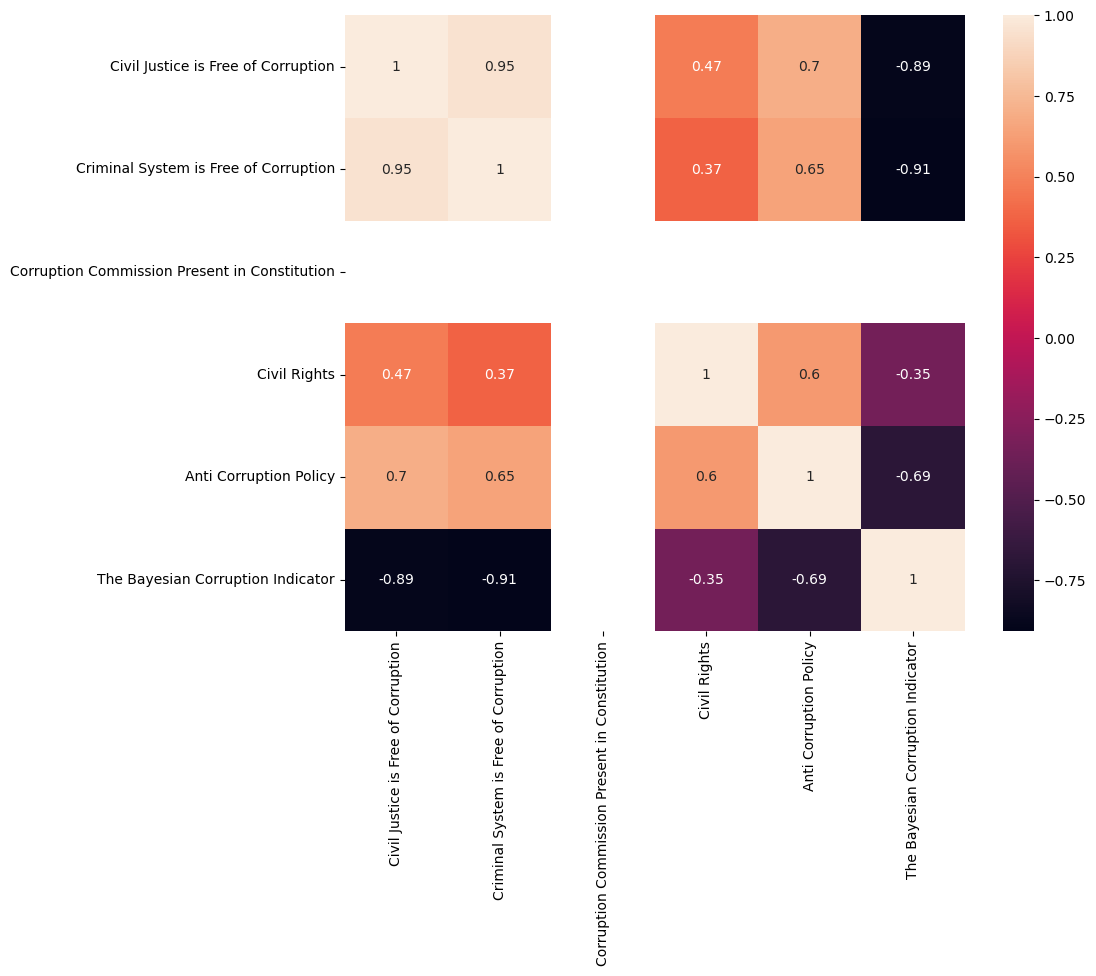

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


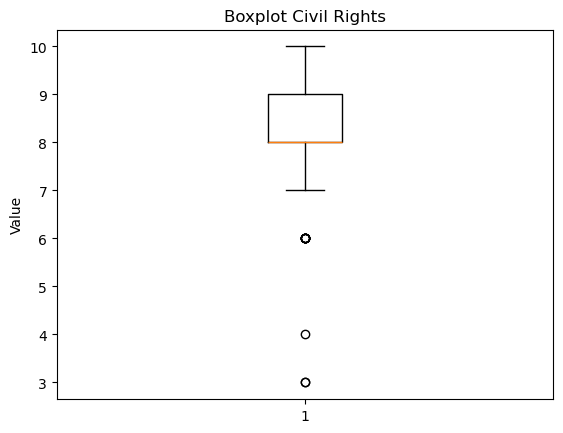

In [15]:
#plt.hist(oecd_data['year'], bins=20)
#plt.title('Year distribution')
#plt.show()

plt.boxplot(oecd_data['Civil Rights'].dropna())
plt.title('Boxplot Civil Rights')
plt.ylabel('Value')
plt.show()

In [44]:
oecd_data['year'] = pd.to_datetime(oecd_data['year']).dt.strftime('%Y')
oecd_data.head()



,cname,year,Civil Justice is Free of Corruption,Criminal System is Free of Corruption,Corruption Commission Present in Constitution,Civil Rights,Anti Corruption Policy,The Bayesian Corruption Indicator
0,Albania,2003,NaN,NaN,"2,00",NaN,NaN,"58,32"
1,Albania,2004,NaN,NaN,"2,00",NaN,NaN,"57,87"
2,Albania,2005,NaN,NaN,"2,00","8,00","4,00","57,98"
3,Albania,2006,NaN,NaN,"2,00",NaN,NaN,"57,75"
4,Albania,2007,NaN,NaN,"2,00","8,00","4,00","57,44"


In [48]:
oecd_data.to_csv("../data/processed/oecd_years.csv", index=False, index_label=False)